In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/vgaurav3011/Car-Evaluation-Analysis/master/data/car.data", names=columns)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
data.drop_duplicates()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

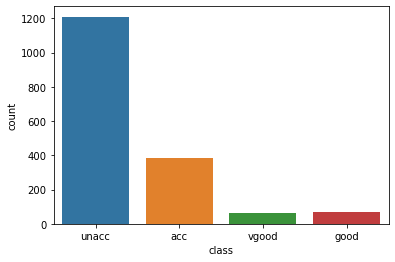

In [9]:
sns.countplot(data['class'])

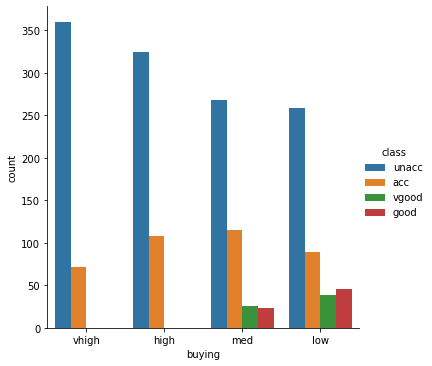

In [10]:
sns.catplot(kind='count', x='buying', hue='class', data=data)

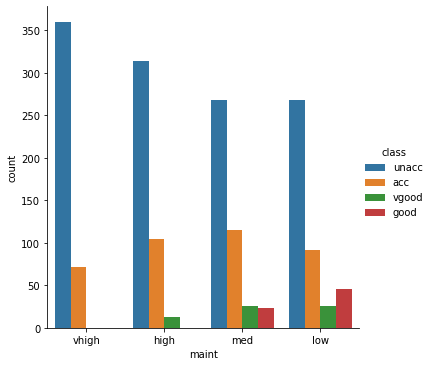

In [11]:
sns.catplot(kind='count', x='maint', hue='class', data=data)

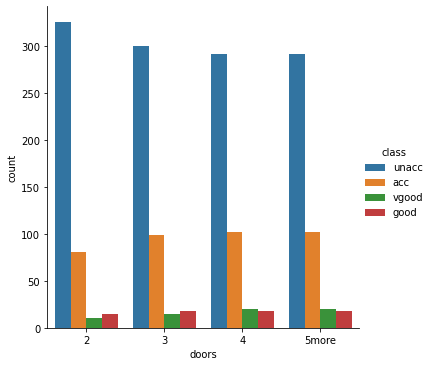

In [13]:
sns.catplot(kind='count', x='doors', hue='class', data=data)

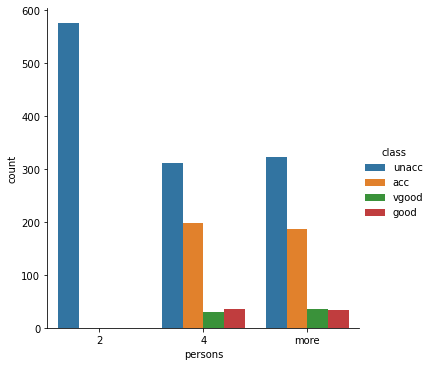

In [14]:
sns.catplot(kind='count', x='persons', hue='class', data=data)

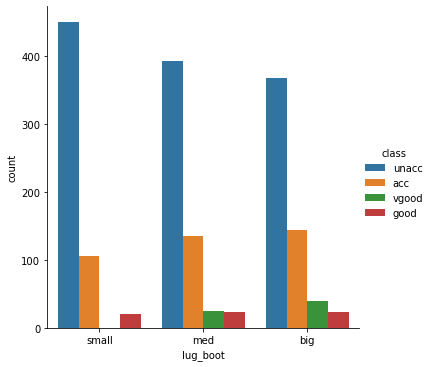

In [15]:
sns.catplot(kind='count', x='lug_boot', hue='class', data=data)

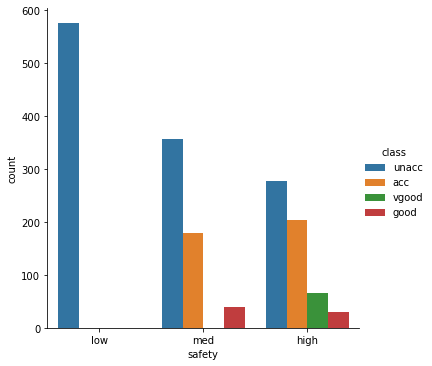

In [16]:
sns.catplot(kind='count', x='safety', hue='class', data=data)

In [17]:
def label(data, feature):
    feature_label_name = {ni: n for n, ni in enumerate(set(data[feature]))}
    return feature_label_name
buying_label = label(data, 'buying')
maint_label = label(data, 'maint')
doors_label = label(data, 'doors')
person_label = label(data, 'persons')
lug_boot_label = label(data, 'lug_boot')
safety_label = label(data, 'safety')
class_label = label(data, 'class')

In [18]:
df1 = data
df1['buying'] = df1['buying'].map(buying_label)
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)
df1['persons'] = df1['persons'].map(person_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)
df1

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,3,2,0,0,2
1,3,3,3,2,0,2,2
2,3,3,3,2,0,1,2
3,3,3,3,2,2,0,2
4,3,3,3,2,2,2,2
...,...,...,...,...,...,...,...
1723,0,0,1,0,2,2,1
1724,0,0,1,0,2,1,3
1725,0,0,1,0,1,0,2
1726,0,0,1,0,1,2,1


In [19]:
lb = LabelEncoder()
df2 = data
for i in df2.columns:
    df2[i] = lb.fit_transform(df2[i])
    
df2['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [20]:
X = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df1['class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
!pip install SMOTE

In [25]:
!pip install imblearn --user

In [26]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [27]:
def classifier(model, X_train_res, X_test, y_train_res, y_test):
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.fit(X_train, y_train)
    score = accuracy_score(y_test, y_pred)
    return score, model

In [28]:
score, lr_model = classifier(LogisticRegression(), X_train, X_test, y_train, y_test)

In [29]:
score

0.75

In [30]:
score, rf = classifier(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)
score

0.9629629629629629

<AxesSubplot:>

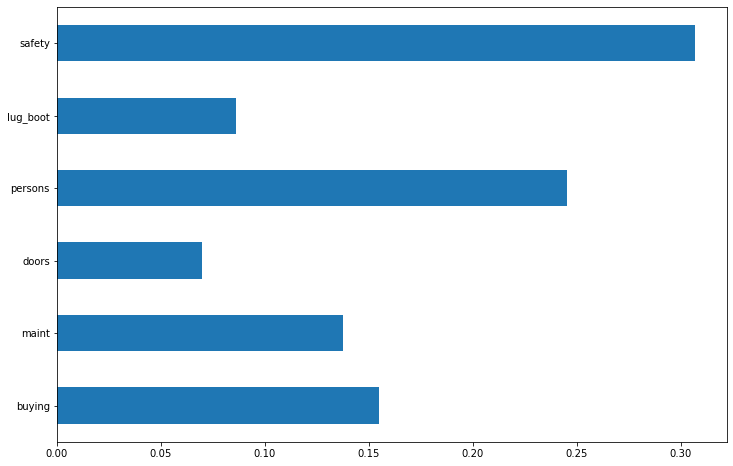

In [31]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [32]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [33]:
grid_search.fit(X_train_res, y_train_res)

NameError: name 'X_train_res' is not defined